# Project Guideline

Hi teman-teman! Silakan menggunakan template notebook ini untuk mengerjakan projectmu.

<br>

**Informasi tambahan,**
1. Copy notebook ini untuk mulai mengerjakan Projectmu.
2. Kamu bebas untuk menambahkan cell pada notebook.

## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [17]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Memasukkan library yang akan kamu gunakan

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


Mengambil file .csv dari Google Drive kamu.

In [18]:
file_path = '/content/drive/MyDrive/Colab Notebooks/housing_data.csv'

In [19]:
try:
    df = pd.read_csv(file_path)
    print("File berhasil dibaca. Berikut 5 baris pertama:")
    print(df.head())
except FileNotFoundError:
    print("File tidak ditemukan. Pastikan path file benar.")
except Exception as e:
    print(f"Terjadi error: {e}")

File berhasil dibaca. Berikut 5 baris pertama:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

In [21]:
print("Sebelum penanganan missing values:")
print(df.isnull().sum())

df_cleaned = df.copy()

for col in df_cleaned.columns:
    if df_cleaned[col].dtype in ['float64', 'int64']:

        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

    else:

        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

print("\nSetelah penanganan missing values:")
print(df_cleaned.isnull().sum())

Sebelum penanganan missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Setelah penanganan missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


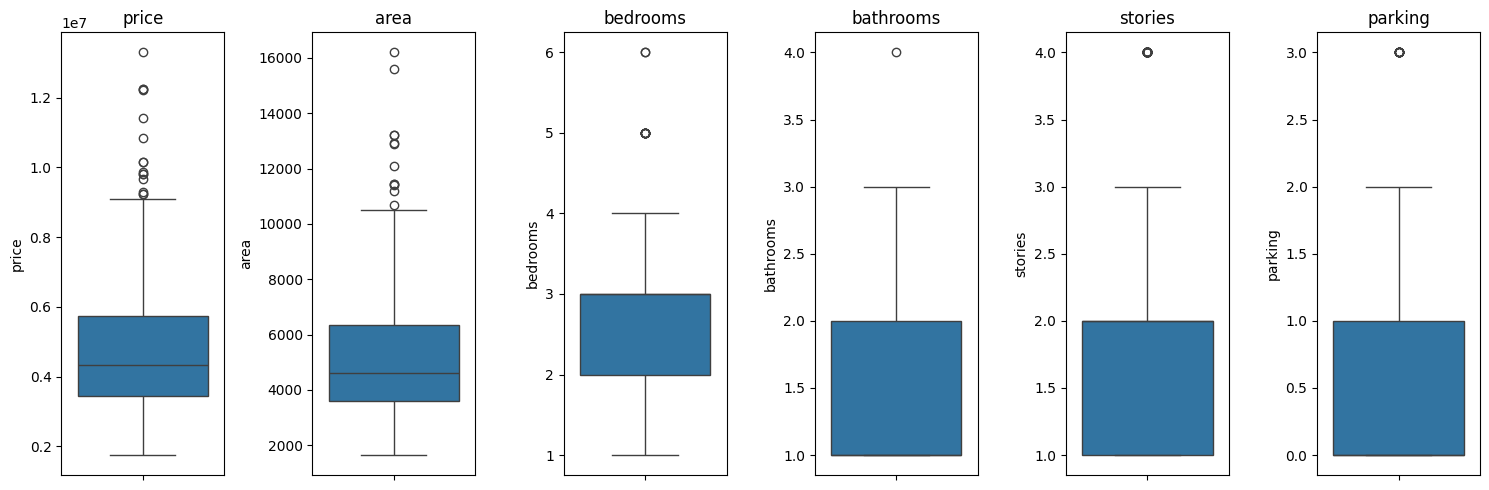

In [23]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound,
                      np.where(df[col] > upper_bound, upper_bound, df[col]))

In [24]:
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nData setelah cleaning:")
print(df.head())


Data setelah cleaning:
       price    area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  9205000.0  7420.0       4.0        2.0      3.0      2.0          True   
1  9205000.0  8960.0       4.0        3.5      3.5      2.5          True   
2  9205000.0  9960.0       3.0        2.0      2.0      2.0          True   
3  9205000.0  7500.0       4.0        2.0      2.0      2.5          True   
4  9205000.0  7420.0       4.0        1.0      2.0      2.0          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnis

## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

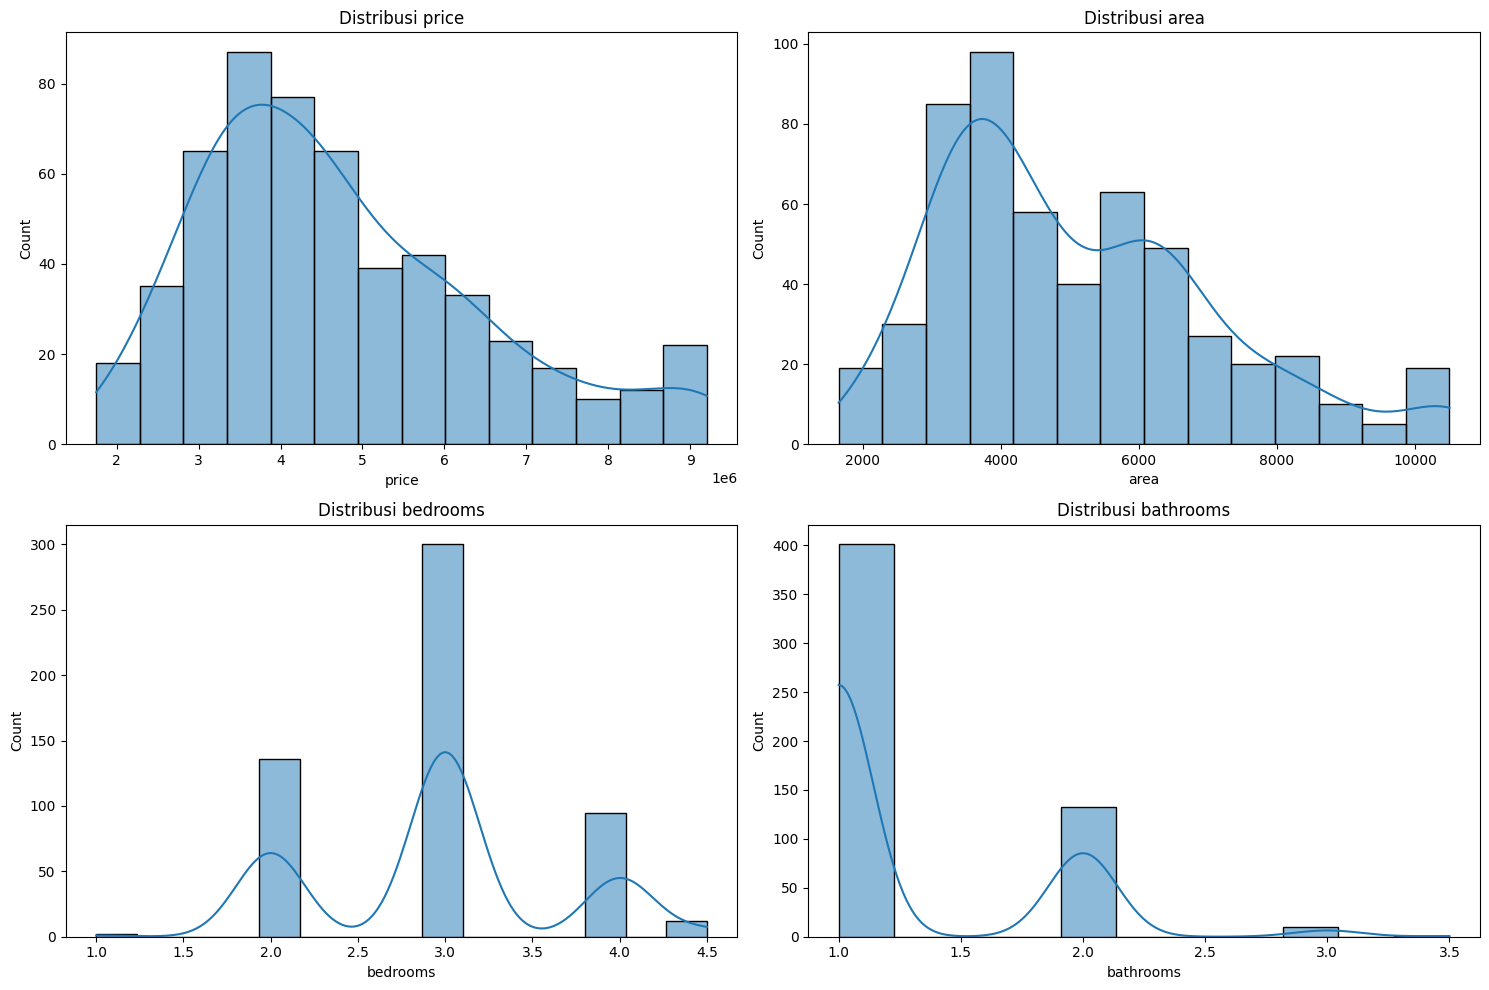

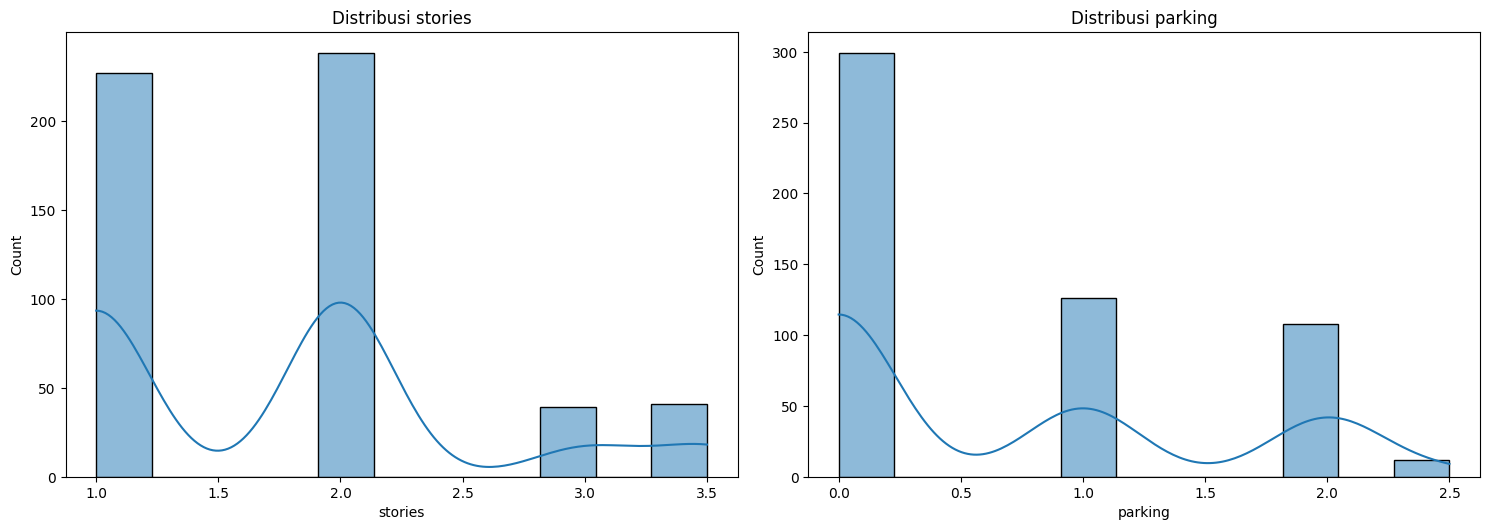

In [26]:
cols_per_page = 4
n_pages = (len(numerical_cols) + cols_per_page - 1) // cols_per_page

for page in range(n_pages):
    start_idx = page * cols_per_page
    end_idx = start_idx + cols_per_page
    current_cols = numerical_cols[start_idx:end_idx]

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(current_cols, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribusi {col}')

    plt.tight_layout()
    plt.show()

## Data Preparation

Memisahkan data training dan testing

In [28]:
print("Daftar kolom yang tersedia:")
print(df.columns.tolist())

Daftar kolom yang tersedia:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


In [29]:
target_column = 'price'

In [30]:
from sklearn.model_selection import train_test_split

# Pastikan kolom target ada di DataFrame
if target_column in df.columns:
    # Memisahkan fitur (X) dan target (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Membagi data menjadi training dan testing set
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42
    )

    print(f"Data terpisah:")
    print(f"- X_train: {X_train.shape}")
    print(f"- X_test: {X_test.shape}")
    print(f"- y_train: {y_train.shape}")
    print(f"- y_test: {y_test.shape}")
else:
    print(f"Error: Kolom target '{target_column}' tidak ditemukan.")
    print("Kolom yang tersedia:", df.columns.tolist())

Data terpisah:
- X_train: (436, 13)
- X_test: (109, 13)
- y_train: (436,)
- y_test: (109,)


## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Membuat model regresi linier
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Memprediksi data training dan testing
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Menghitung metrik evaluasi
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")

# Menampilkan koefisien model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nKoefisien Model:")
print(coefficients)

Training MSE: 863144189317.5255
Testing MSE: 1286637069521.3794
Training R-squared: 0.6894
Testing R-squared: 0.6815

Koefisien Model:
                            Feature   Coefficient
0                              area  2.552437e+02
1                          bedrooms  6.245451e+04
2                         bathrooms  1.018876e+06
3                           stories  4.322514e+05
4                           parking  1.962472e+05
5                      mainroad_yes  3.740572e+05
6                     guestroom_yes  2.390273e+05
7                      basement_yes  3.506219e+05
8               hotwaterheating_yes  7.151186e+05
9               airconditioning_yes  7.627237e+05
10                     prefarea_yes  5.866456e+05
11  furnishingstatus_semi-furnished -9.704403e+04
12     furnishingstatus_unfurnished -3.890334e+05


## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

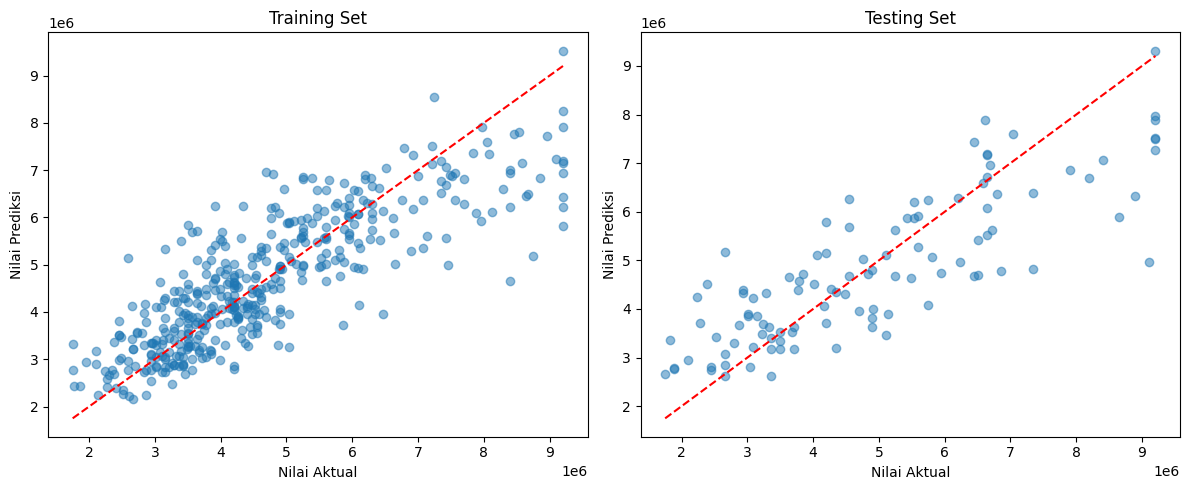

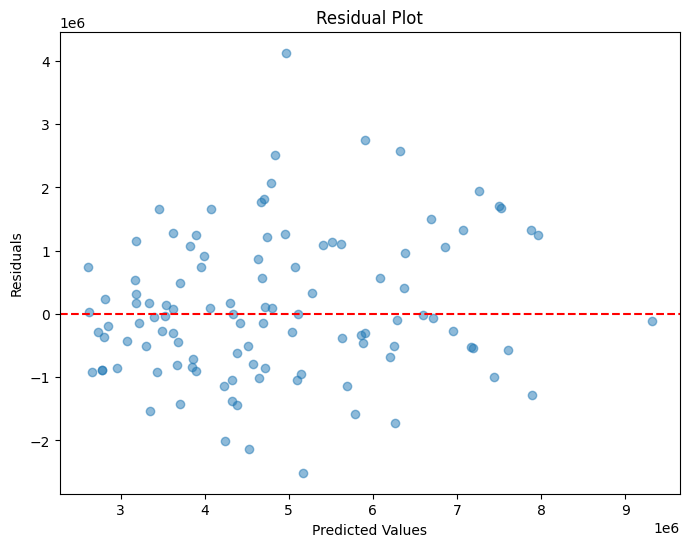


Interpretasi Hasil:
1. Berdasarkan metrik R-squared, model menjelaskan sekitar 68.15% variasi dalam data.
2. Residual plot menunjukkan pola acak, mengindikasikan model yang cukup baik.
3. Koefisien model menunjukkan kontribusi masing-masing fitur terhadap target.


In [33]:
# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Training Set')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Testing Set')

plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Interpretasi hasil
print("\nInterpretasi Hasil:")
print("1. Berdasarkan metrik R-squared, model menjelaskan sekitar {:.2f}% variasi dalam data.".format(test_r2*100))
print("2. Residual plot menunjukkan pola acak, mengindikasikan model yang cukup baik.")
print("3. Koefisien model menunjukkan kontribusi masing-masing fitur terhadap target.")